<a href="https://colab.research.google.com/github/metamath1/noviceml/blob/master/CHAP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10장 그림 및 예제 코드

In [ ]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm
import sympy

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [ ]:
# 데이터 파일 사용을 위한 github repo 복사
# !주의! 
# 구글 colab 환경에서 실행하는 경우만 실행하세요.
# 로컬환경에서는 실행하지 마세요.
!git clone -l -s https://github.com/metamath1/noviceml.git noviceml

Cloning into 'noviceml'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 80 (delta 12), reused 19 (delta 4), pack-reused 48
Unpacking objects: 100% (80/80), done.


In [ ]:
# 구글 colab 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
path = 'noviceml/font/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# 로컬 환경일 경우 그래프에 한글 폰트 사용을 위한 설정
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
# 아래 코드의 주석 제거 후 경로를 유저 컴퓨터의 폰트 파일 경로로 수정하세요.
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontprop = mfm.FontProperties(fname=path, size=18)

## 데이터 로드

In [ ]:
# 데이터 로드
D = np.load('noviceml/data_1d.npz')

x = D['x']
t = D['t']
X_train = D['X_train']
Y_train = D['Y_train']
X_test = D['X_test']
Y_test = D['Y_test']

N = X_train.shape[0]

## 그림 10-1

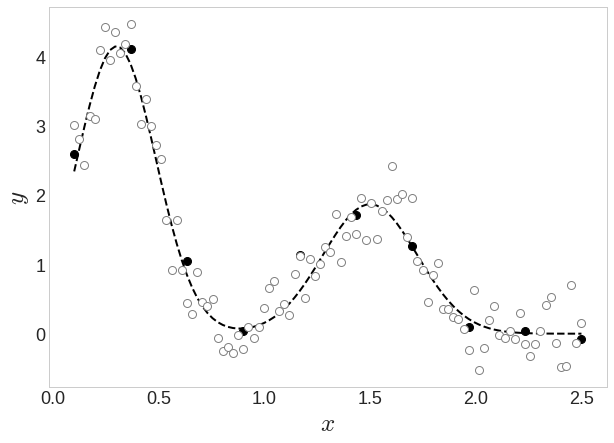

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k')
ax.plot(X_train, Y_train, 'ko', markersize=8, label='Train data')
ax.plot(X_test, Y_test, 'o', markerfacecolor='w', markeredgecolor='gray', 
       markersize=8, label='Test data')

if file_print == True :
    fig.savefig("imgs/chap10/fig10-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 10-2

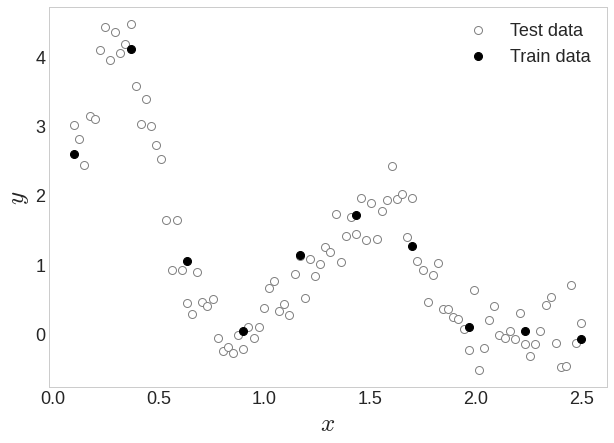

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(X_test, Y_test, 'o', markerfacecolor='w', markeredgecolor='gray', 
       markersize=8, label='Test data')
ax.plot(X_train, Y_train, 'ko', markersize=8, label='Train data')
ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-2.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-2.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [ ]:
X_train

array([0.1   , 0.3667, 0.6333, 0.9   , 1.1667, 1.4333, 1.7   , 1.9667, 2.2333, 2.5   ])

In [ ]:
X_train.reshape(-1,1)

array([[0.1   ],
       [0.3667],
       [0.6333],
       [0.9   ],
       [1.1667],
       [1.4333],
       [1.7   ],
       [1.9667],
       [2.2333],
       [2.5   ]])

## 선형모델

In [ ]:
# 첫번째 요소에 1을 추가하고
X = np.array([np.ones_like(X_train), X_train]).T
print("첫 요소에 1을 추가하여 각각을 벡터로 만든 x_train : X")
print(X.shape)
print(X)
print('\n')

첫 요소에 1을 추가하여 각각을 벡터로 만든 x_train : X
(10, 2)
[[1.     0.1   ]
 [1.     0.3667]
 [1.     0.6333]
 [1.     0.9   ]
 [1.     1.1667]
 [1.     1.4333]
 [1.     1.7   ]
 [1.     1.9667]
 [1.     2.2333]
 [1.     2.5   ]]




In [ ]:
# 결정해야하는 w 두 개
w1 = 3.5
w2 = -2.0
w = np.array([w1, w2])

#w와 내적을 하면 결과값 10개가 만들어 진다. w^t X
print("w와 X의 내적")
print(np.dot(X,w.reshape(-1,1)))

w와 X의 내적
[[ 3.3   ]
 [ 2.7667]
 [ 2.2333]
 [ 1.7   ]
 [ 1.1667]
 [ 0.6333]
 [ 0.1   ]
 [-0.4333]
 [-0.9667]
 [-1.5   ]]


## 그림 10-3

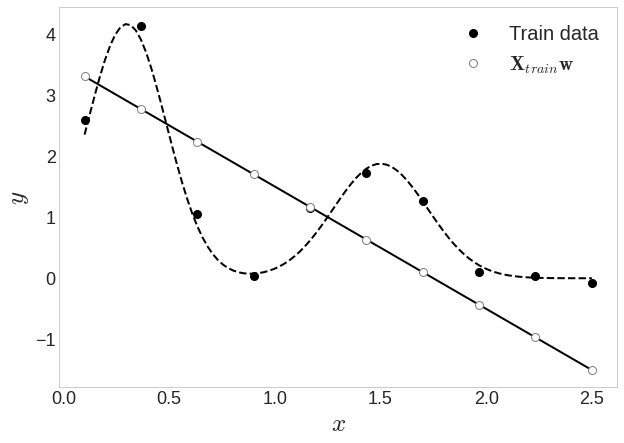

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, x*w[1]+w[0], color='k')
ax.plot(X_train, Y_train, 'ko', markersize=8, label='Train data')
ax.plot(X_train, np.dot(X,w.reshape(-1,1)), 'o', markerfacecolor='w', markeredgecolor='gray', 
        markersize=8, label=r"$\mathbf{X}_{train}\mathbf{w}$")
ax.plot(x, t, '--', color='k')

ax.legend(fontsize=20)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-3.pdf", format='pdf', bbox_inches='tight')
    
    
plt.show()

## 선형모델의 오차

## 그림 10-4

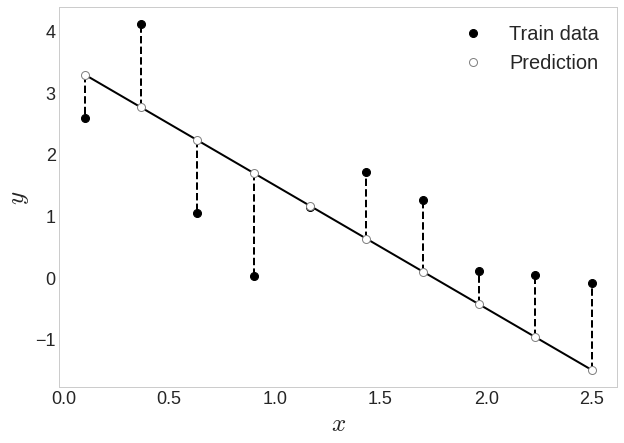

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

Y_pred = np.dot(X, w.reshape(-1,1)).reshape(-1)

ax.plot([X_train, X_train], [Y_pred, Y_train], '--', color='k')
ax.plot(x, x*w[1]+w[0], color='k')
ax.plot(X_train, Y_train, 'ko', markersize=8, label='Train data')
ax.plot(X_train, Y_pred, 'o', markerfacecolor='w', markeredgecolor='gray', 
        markersize=8, label=r"Prediction")


ax.legend(fontsize=20)


if file_print == True :
    fig.savefig("imgs/chap10/fig10-4.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-4.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [ ]:
# 오차 계산
0.5*(((Y_train - Y_pred)**2).sum()) 

6.171744429866503

## 기저함수 함수 사용

## 그림 10-5

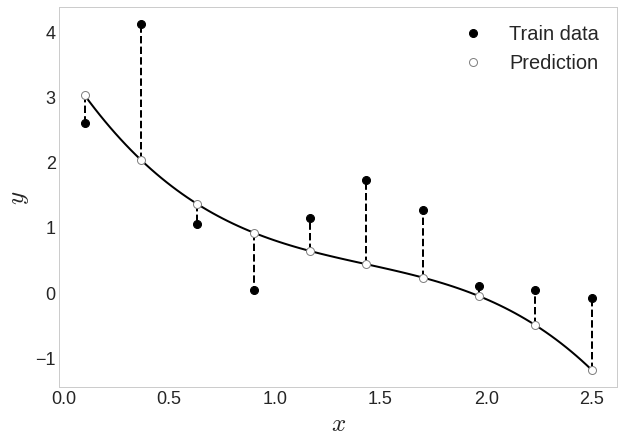

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

coef = (3.5, -5.0,  3.0, -0.7)
y = coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3
Y_pred = coef[0] + coef[1]*X_train + coef[2]*X_train**2 + coef[3]*X_train**3

ax.plot([X_train, X_train],[Y_pred, Y_train], '--', color='k')
ax.plot(x, y, color='k')
ax.plot(X_train, Y_train, 'o',  markersize=8 , color='k', label=r'Train data')
ax.plot(X_train, Y_pred,  'o', markerfacecolor='w', markeredgecolor='gray', 
        markersize=8,  label=r'Prediction')

ax.legend(fontsize=20)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-5.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [ ]:
# 오차 계산
0.5*(((Y_train - Y_pred)**2).sum()) 

4.965242925784168

## 넘파이와 사이킷런을 이용한 다항식 회귀

In [ ]:
##########################################################
# for sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## 그림 10-6

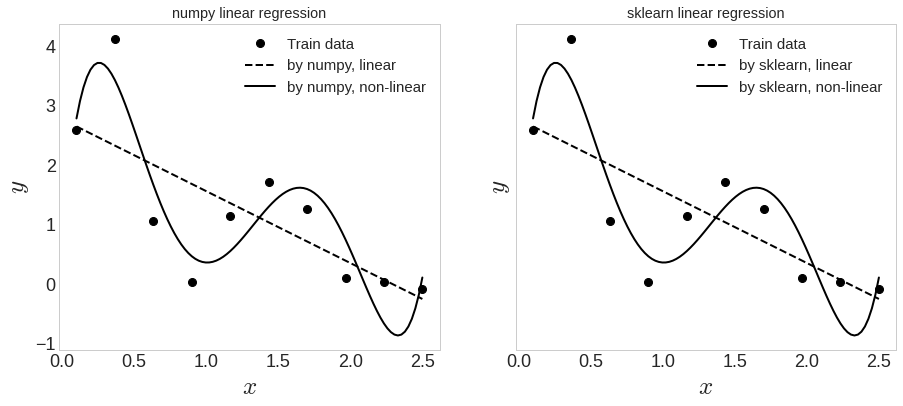

numpy coef.   : [  0.7995  27.0562 -80.0685  82.7845 -35.6486   5.4386] 
sklearn coef. : [  0.7995  27.0562 -80.0685  82.7845 -35.6486   5.4386] 


In [ ]:
######################################################
# 본격적으로 회귀를 하기 전에 기존 라이브러리를 이용하여 
# 결과를 만들고 우리 알고리즘의 결과와 비교해보자.
######################################################
# P차 다항식
# w가 5차원 벡터, 각 4차 계수, 각 3차 계수, 2차 계수, 1차 계수, 0차 계수(상수) 
P = 5

#########################################################################
## 넘파이 라이브러리를 사용해서 간단하게 구할 수 있다.
#########################################################################
# 1차 다항식
z_lin    = np.polyfit(X_train, Y_train, 1) 

# P차 다항식
z_nonlin = np.polyfit(X_train, Y_train, P)

y_lin    = np.poly1d(z_lin)
y_nonlin = np.poly1d(z_nonlin)
#########################################################################

#########################################################################
## sklearn 라이브러리를 사용해서 간단(?)하게 구할 수 있다.
#########################################################################
# 1차 다항식
model = LinearRegression(fit_intercept=True)
model.fit(X_train[:, np.newaxis], Y_train)
y_sk_lin = model.predict(x[:, np.newaxis])

# P차 다항식
poly_model = make_pipeline(PolynomialFeatures(P), LinearRegression())
poly_model.fit(X_train[:, np.newaxis], Y_train)
y_sk_nonlin = poly_model.predict(x[:, np.newaxis])

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
ax1.plot(X_train, Y_train, 'o',  markersize=8, color='k', label=r"Train data")
ax1.plot(x, y_lin(x), '--', color='k', label=r"by numpy, linear")
ax1.plot(x, y_nonlin(x), color='k', label=r"by numpy, non-linear")
ax1.legend(fontsize=15)
ax1.set_title('numpy linear regression')

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
ax2.plot(X_train, Y_train, 'o',  markersize=8, color='k', label=r"Train data")
ax2.plot(x, y_sk_lin, '--', color='k', label=r"by sklearn, linear")
ax2.plot(x, y_sk_nonlin, color='k', label=r"by sklearn, non-linear")
ax2.legend(fontsize=15)
ax2.set_title('sklearn linear regression')

if file_print == True :
    fig.savefig("imgs/chap10/fig10-6.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-6.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

poly_model.steps[-1][1].coef_[0] = poly_model.steps[-1][1].intercept_ 
print("numpy coef.   : {} ".format(z_nonlin[::-1]))
print("sklearn coef. : {} ".format( poly_model.steps[-1][1].coef_ ))

## 목적함수와 경사도 벡터

In [ ]:
print(P)
X = np.array([ X_train**i for i in range(P+1) ])  
print(X)

w = np.random.rand(P+1)
print(w)
Y_pred = (w.reshape(-1,1) * X).sum(axis=0)
print(Y_pred)

# sum 없이 하려면?
print(np.dot(X.T, w))

5
[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e-01 3.6667e-01 6.3333e-01 9.0000e-01 1.1667e+00 1.4333e+00 1.7000e+00 1.9667e+00 2.2333e+00 2.5000e+00]
 [1.0000e-02 1.3444e-01 4.0111e-01 8.1000e-01 1.3611e+00 2.0544e+00 2.8900e+00 3.8678e+00 4.9878e+00 6.2500e+00]
 [1.0000e-03 4.9296e-02 2.5404e-01 7.2900e-01 1.5880e+00 2.9447e+00 4.9130e+00 7.6066e+00 1.1139e+01 1.5625e+01]
 [1.0000e-04 1.8075e-02 1.6089e-01 6.5610e-01 1.8526e+00 4.2207e+00 8.3521e+00 1.4960e+01 2.4878e+01 3.9062e+01]
 [1.0000e-05 6.6276e-03 1.0190e-01 5.9049e-01 2.1614e+00 6.0497e+00 1.4199e+01 2.9421e+01 5.5561e+01 9.7656e+01]]
[0.3118 0.4742 0.8433 0.8053 0.9476 0.0544]
[ 0.3685  0.6562  1.313   2.6626  5.1649  9.4243 16.1988 26.4088 41.1458 61.6811]
[ 0.3685  0.6562  1.313   2.6626  5.1649  9.4243 16.1988 26.4088 41.1458 61.6811]


In [ ]:
def J(w, P, x, y):
    """
    Error function
    J(w)= (1/2) * sum_{n=1}^{N} {y(x_n,w) - t_n}^2
    y(x_n, w) = w_0*x^0 + w_1*x^1 + w_2*x^2 + ... + w_M*x^M
    """
    X = np.array([ x**i for i in range(P+1) ])  
    y_pred = np.dot(X.T, w) # y_pred = (w.reshape(-1,1) * X).sum(axis=0)
    
    return 0.5*(( (y - y_pred)**2 ).sum())

In [ ]:
print("{:.6f}".format(J(np.random.rand(4), 3, X_train, Y_train)))
print("{:.6f}".format(J(np.random.rand(6), 5, X_train, Y_train)))

86.455903
5637.172231


In [ ]:
def grad_anal(w, P, x, y):
    """
    This function computes the analytic gradient of the objective function
    x, t : data for error function eval.
    """
    N = x.shape[0]
    PI = np.hstack( np.array( [np.power(x.reshape(N,1), p) for p in range(P+1)] ) )
    
    # 위 식을 그대로 코딩
    # g_  = np.dot(w.T, np.dot(PI.T, PI) ) - np.dot(y.T, PI)
    
    # 식을 정리해서 np.dot 2번으로...
    g = np.dot( np.dot(w.T,PI.T)-y.T , PI)
    
    return g
    

## 경사하강법을 이용한 선형회귀

In [ ]:
from scipy import optimize

In [ ]:
np.random.seed(0)

# P를 1, 3, 6, 12에 대해서 한번씩 피팅
Ps = [1, 3, 6, 12]

# 피팅결과 구해진 파라미터를 W에 저장
W = []

# 학습데이터를 넘기면서 fitting
for P in Ps :
    w = np.random.uniform(-1, 1, P+1)
    
    ############################################################################
    # scipy.optimize.minimize 사용하는 경우
    ret = optimize.minimize(J, w,  args=(P, X_train, Y_train), 
                            jac=grad_anal, method='SLSQP')
    W.append(ret.x)
    print(ret)
    ############################################################################
    
    print('\n')

     fun: 3.885207834041835
     jac: array([1.4433e-15, 2.5535e-15])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 2.7696, -1.2081])


     fun: 3.4455063925535767
     jac: array([ 1.0348e-04, -1.3520e-04, -8.0562e-05,  5.3705e-05])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([ 3.7515, -4.9209,  3.0384, -0.6851])


     fun: 0.009816210285868793
     jac: array([ 2.5636e-06, -4.1190e-08, -1.4329e-05, -7.6739e-06,  4.6361e-06,  6.7848e-06, -2.6317e-06])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 36
    njev: 36
  status: 0
 success: True
       x: array([  -2.7948,   76.3267, -256.8238,  345.8317, -222.4441,   68.3042,   -8.0596])


     fun: 0.002234583085477833
     jac: array([-2.7093e-05,  6.3770e-05,  4.5506e-05,  6.3097e-06,  7.1431e-05,  1.7677e-04,  3.0429e-04,  5.4298e-04,  1.

## 그림 10-8

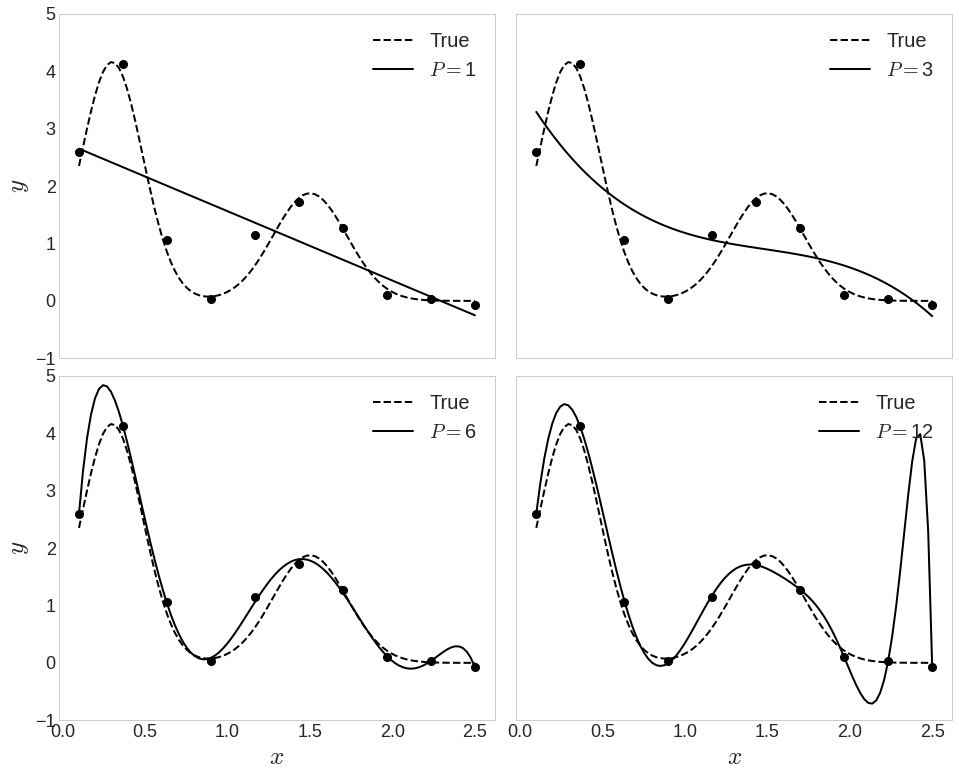

,P=1,P=3,P=6,P=12
0,2.769644,3.751458,-2.794784,-0.586750
1,-1.208138,-4.920928,76.326667,40.315683
2,NaN,3.038434,-256.823759,-86.222961
3,NaN,-0.685101,345.831691,8.584005
4,NaN,NaN,-222.444149,58.069182
5,NaN,NaN,68.304217,20.164601
6,NaN,NaN,-8.059628,-33.711999
7,NaN,NaN,NaN,-34.534380
8,NaN,NaN,NaN,16.864389
9,NaN,NaN,NaN,35.359009


In [ ]:
import pandas as pd
from IPython.display import display

fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
fig.set_size_inches((16,13))

j = 0
ax[0,0].set_ylim(-1,5)

for P in Ps :
    p, q = divmod(j, 2)
    X = np.array([ x**i for i in range(P+1) ])  
    y = (W[j].reshape(-1,1) * X).sum(axis=0)
    
    ax[p,q].xaxis.set_tick_params(labelsize=18)
    ax[p,q].yaxis.set_tick_params(labelsize=18)
    ax[p,q].set_xlabel('$x$', fontsize=25)
    ax[p,q].set_ylabel('$y$', fontsize=25)
    ax[p,q].grid(False)

    ax[p,q].plot(x, t, '--', color='k', label="True")
    ax[p,q].plot(X_train, Y_train, 'o',  markersize=8 , color='k')
    ax[p,q].plot(x, y, color='k', label="$P=${}".format(P))
    ax[p,q].legend(loc='upper right', fontsize=20)

    j+=1

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-8.pdf", format='pdf', bbox_inches='tight')

plt.show()

# 회귀계수를 모아서 테이블 형태로 출력
A = np.full((Ps[-1]+1, len(Ps)), np.nan)
for i in range(len(W)) :
    A[0:W[i].shape[0], i] = W[i]

df = pd.DataFrame(data=A,  columns=['P={}'.format(i) for i in Ps])
display(df)  # OR print(df.to_html()) or display(HTML(df.to_html()))  


## 결과 평가

In [ ]:
def rmse(w, J, P, x, y) :
    return np.sqrt( (2*J(w, P, x, y)) / x.shape[0] )

## 그림 10-9

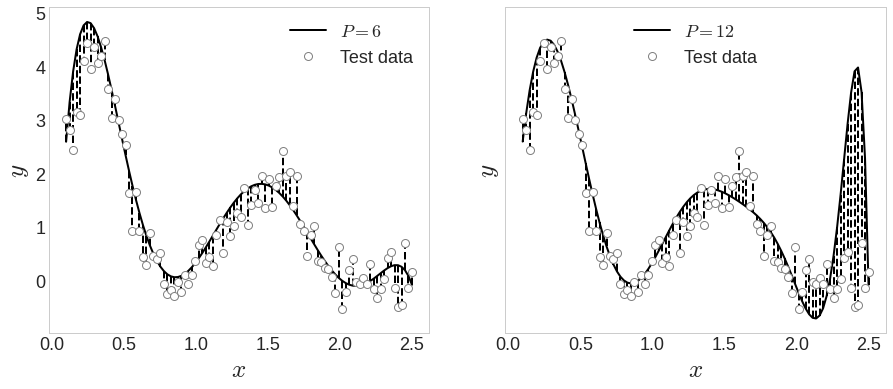

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

X = np.array([ x**i for i in range(6+1) ])  
y_6 = (W[-2].reshape(-1,1) * X).sum(axis=0)
X = np.array([ X_test**i for i in range(6+1) ])  
y_6_test = (W[-2].reshape(-1,1) * X).sum(axis=0)

X = np.array([ x**i for i in range(12+1) ])  
y_12 = (W[-1].reshape(-1,1) * X).sum(axis=0)
X = np.array([ X_test**i for i in range(12+1) ]) 
y_12_test = (W[-1].reshape(-1,1) * X).sum(axis=0)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
ax1.plot([X_test, X_test],[y_6_test, Y_test], '--', color='k')
ax1.plot(x, y_6, color='k', label=r'$P=6$')
ax1.plot(X_test, Y_test, 'o', markerfacecolor='w', markeredgecolor='gray', 
       markersize=8, label='Test data')
ax1.legend(fontsize=18)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
ax2.plot([X_test, X_test],[y_12_test, Y_test], '--', color='k')
ax2.plot(x, y_12, color='k', label=r'$P=12$')
ax2.plot(X_test, Y_test, 'o', markerfacecolor='w', markeredgecolor='gray', 
       markersize=8, label='Test data')
ax2.legend(fontsize=18)



if file_print == True :
    fig.savefig("imgs/chap10/fig10-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-9.pdf", format='pdf', bbox_inches='tight')
    
plt.show()


## 과대적합 실험

In [ ]:
np.random.seed(0)

# P를 0~(P_overfit-1)에 대해서 한번씩 피팅
P_overfit = 12
Ps = np.arange(P_overfit+1)

# 피팅결과 구해진 파라미터를 W에 저장
W = []

# 학습데이터를 넘기면서 fitting
for P in Ps :
    w = np.random.uniform(-1, 1, P+1)

    ############################################################################
    # scipy.optimize.minimize 사용하는 경우
    ret = optimize.minimize(J, w,  args=(P, X_train, Y_train), 
                            jac=grad_anal, method='SLSQP')
                            
    print(ret)
    W.append(ret.x)
    ############################################################################
    
    print('\n')

     fun: 8.166690145008648
     jac: array([-1.3323e-15])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.1991])


     fun: 3.8852078340418346
     jac: array([-6.3283e-15, -4.3299e-15])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 2.7696, -1.2081])


     fun: 3.705989424330791
     jac: array([1.1879e-14, 1.9040e-14, 4.1300e-14])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 3.1739, -2.1608,  0.3664])


     fun: 3.445506329361491
     jac: array([-1.1223e-05,  5.7160e-05,  5.8114e-05, -3.6805e-05])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 3.751 , -4.9195,  3.0374, -0.6849])


     fun: 3.4268467893357974
     jac: array([ 7.5898e-05,  7.2932

In [ ]:
# 회귀계수를 모아서 테이블 형태로 출력
A = np.full((len(Ps), len(Ps)), np.nan)
for i in range(len(W)) :
    A[0:W[i].shape[0], i] = W[i]
    
df = pd.DataFrame(data=A,  columns=['P={}'.format(i) for i in range(len(Ps))])
display(df)  # OR print(df.to_html()) or display(HTML(df.to_html()))    

,P=0,P=1,P=2,P=3,P=4,P=5,P=6,P=7,P=8,P=9,P=10,P=11,P=12
0,1.199066,2.769644,3.173902,3.750987,3.561913,0.799549,-2.794306,-0.584076,-1.867044,-0.797312,-1.897327,-1.225345,-0.587949
1,NaN,-1.208138,-2.160770,-4.919524,-3.434200,27.057473,76.321567,42.368127,60.619737,44.214575,60.476223,49.823209,40.341332
2,NaN,NaN,0.366397,3.037407,0.456591,-80.073051,-256.809556,-108.143661,-174.769765,-106.314748,-168.272122,-121.773408,-86.414618
3,NaN,NaN,NaN,-0.684884,0.860990,82.789397,345.814896,58.070544,146.049691,39.698942,118.971404,46.519763,9.232995
4,NaN,NaN,NaN,NaN,-0.297303,-35.650732,-222.434455,64.113358,41.364858,69.417905,68.969870,78.391515,57.015235
5,NaN,NaN,NaN,NaN,NaN,5.438929,68.301514,-84.653401,-131.994463,-26.369917,-91.934261,-17.870524,20.825204
6,NaN,NaN,NaN,NaN,NaN,NaN,-8.059336,33.511565,79.256677,-58.123282,-39.018220,-64.585249,-33.433409
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.515290,-20.292713,53.802370,94.796548,4.179897,-35.157876
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.946883,-17.255251,-54.180218,60.061090,17.102164
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.960633,13.816769,-44.825644,35.455518


## 그림 10-10

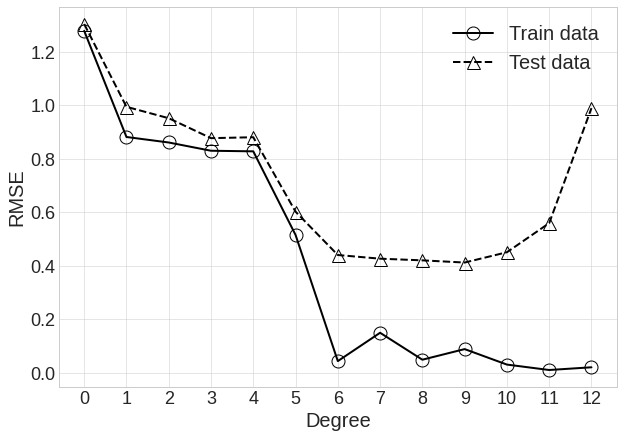

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

RMSE = np.zeros((len(Ps), 3))

for i in Ps :
    RMSE[i, 0] = i
    RMSE[i, 1] = rmse(W[i], J, W[i].shape[0]-1, X_train, Y_train)
    RMSE[i, 2] = rmse(W[i], J, W[i].shape[0]-1, X_test, Y_test)

ax.plot(RMSE[:,0], RMSE[:,1], 'o-', color='k', markersize=13, fillstyle='none', label='Train data')    
ax.plot(RMSE[:,0], RMSE[:,2], '^--', color='k', markersize=13, fillstyle='none', label='Test data')
ax.set_xticks( np.arange(len(Ps)))

ax.set_xlabel('Degree', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)

plt.legend(fontsize=20)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-10.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-10.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 과대적합 해결

## 그림 10-11

     fun: 5.913373354910268
     jac: array([ 7.2968e-07,  4.3711e-05, -2.5239e-04,  5.0146e-04, -3.8538e-04, -1.0464e-04,  3.2961e-04, -3.3935e-05, -2.8461e-04,  2.1687e-04, -1.5705e-04,
       -1.3545e-04, -3.6968e-04])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 40
    njev: 40
  status: 0
 success: True
       x: array([  -1.949 ,   53.6163, -140.6764,   83.0757,   73.0042,  -56.8196,  -61.8145,   46.7243,   49.4922,  -74.1632,   37.7378,   -8.9559,    0.8345])


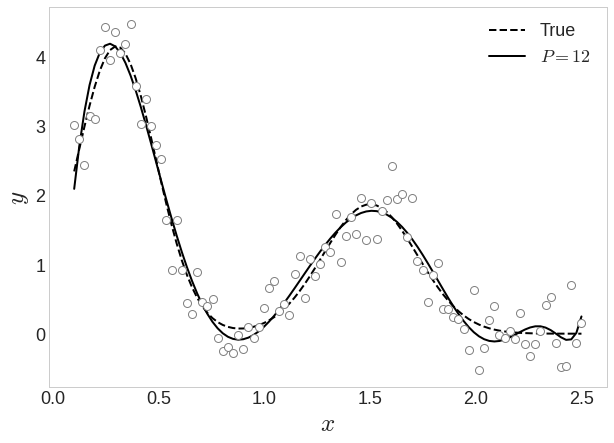

w:[  -1.949    53.6163 -140.6764   83.0757   73.0042  -56.8196  -61.8145   46.7243   49.4922  -74.1632   37.7378   -8.9559    0.8345]


In [ ]:
np.random.seed(0)

###########################################
# 12차로 더 많은 데이터를 모아 선형회귀 시도
###########################################
P = 12

w = np.random.uniform(-1, 1, P+1)

############################################################################
# scipy.optimize.minimize 사용하는 경우
ret = optimize.minimize(J, w,  args=(P, X_test, Y_test), 
                            jac=grad_anal, method='SLSQP')
print(ret)
w = ret.x
############################################################################

###########################################
# 많은 데이터에 대한 회귀 결과 출력
###########################################
X = np.array([ x**i for i in range(P+1) ])  
y = (w.reshape(-1,1) * X).sum(axis=0)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k', label='True')
ax.plot(x, y, color='k', label=r'$P=12$')
ax.plot(X_test, Y_test, 'o', markerfacecolor='w', markeredgecolor='gray', markersize=8, color='k')
ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-11.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-11.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

print("w:{}".format(w.reshape(1,-1)[::-1][0]))

## 규제

In [ ]:
W[4]


array([ 3.5619, -3.4342,  0.4566,  0.861 , -0.2973])

In [ ]:
W[-1]

array([ -0.5879,  40.3413, -86.4146,   9.233 ,  57.0152,  20.8252, -33.4334, -35.1579,  17.1022,  35.4555, -33.7066,  10.9175,  -1.2505])

In [ ]:
###########################################
# L2 Reg. term을 가진 에러함수를 다시 정의하고 피팅 시도
###########################################
def J_L2(w, P, x, y):
    """
    Error function with L2 Reg. term
    """
    X = np.array([ x**i for i in range(P+1) ])  
    y_pred = (w.reshape(-1,1) * X).sum(axis=0)
    
    #                                                L2 reg. term
    # return 0.5*(( (y_pred - y)**2 ).sum()) + (lamda/2.) * np.linalg.norm(w[1:])**2
    return 0.5*(( (y - y_pred)**2 ).sum()) + (lamda/2.) * np.linalg.norm(w)**2


def grad_anal_L2(w, P, x, y):
    """
    This function computes the analytic gradient of the objective function
    x, t : data for error function eval.
    """
    N = x.shape[0]
    PI = np.hstack( np.array( [np.power(x.reshape(N,1), p) for p in range(P+1)] ) )
    
    g = np.dot(np.dot(w.T,PI.T)-y.T , PI)
    
    # g_reg = np.hstack( np.array([0 , lamda*w[1:]]) )
    g_reg = lamda*w
    
    g = g + g_reg
    
    return g
    

## 그림 10-12

     fun: 0.34749659136392885
     jac: array([-5.5455e-06,  5.8364e-06,  3.3753e-06, -1.5886e-05, -1.3939e-05, -1.7824e-06, -5.5570e-05, -7.9053e-05, -1.2471e-04, -2.3709e-04, -3.3568e-04,
       -3.4910e-04,  2.1619e-04])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 37
    njev: 37
  status: 0
 success: True
       x: array([  0.5938,  26.3377, -52.3529,  -0.7034,  31.0342,  16.0466, -13.2641, -18.6246,   3.9871,  16.1792, -12.0452,   3.2923,  -0.3243])


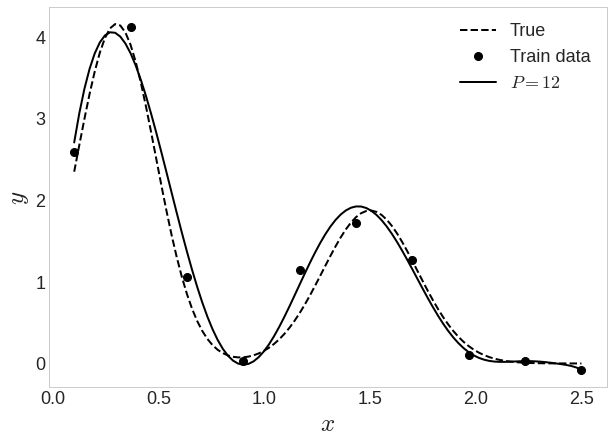

0.40088568138749453

In [ ]:
np.random.seed(0)

P = 12
lamda = 0.00007 
w = np.random.uniform(-1, 1, P+1)

############################################################################
# scipy.optimize.minimize 사용하는 경우
ret = optimize.minimize(J_L2, w,  args=(P, X_train, Y_train), 
                        jac=grad_anal_L2, method='SLSQP')
print(ret)
w = ret.x
############################################################################

###########################################
# L2 레귤러라이제이션 결과 출력
###########################################
X = np.array([ x**i for i in range(P+1) ])  
y = (w.reshape(-1,1) * X).sum(axis=0)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k', label='True')
ax.plot(X_train, Y_train, 'o', markersize=8, color='k', label='Train data')
ax.plot(x, y, color='k', label=r'$P=12$')
ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-12.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-12.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

rmse(w, J, w.shape[0]-1, X_test, Y_test)

## 확률적 경사하강법 SGD

## 그림 10-13

Epoch:  0, Cost: 126.1599
Epoch:  1, Cost: 67.6216
Epoch:  2, Cost: 52.0043
Epoch:  3, Cost: 49.9746
Epoch:  4, Cost: 57.7140
Epoch:  5, Cost: 51.3382
Epoch:  6, Cost: 50.5427
Epoch:  7, Cost: 78.3322
Epoch:  8, Cost: 78.3285
Epoch:  9, Cost: 53.1112
Epoch: 10, Cost: 49.8108
Epoch: 11, Cost: 52.4464
Epoch: 12, Cost: 51.9565
Epoch: 13, Cost: 49.7057
Epoch: 14, Cost: 49.3376
Epoch: 15, Cost: 49.4173
[ 2.8308 -1.2847]


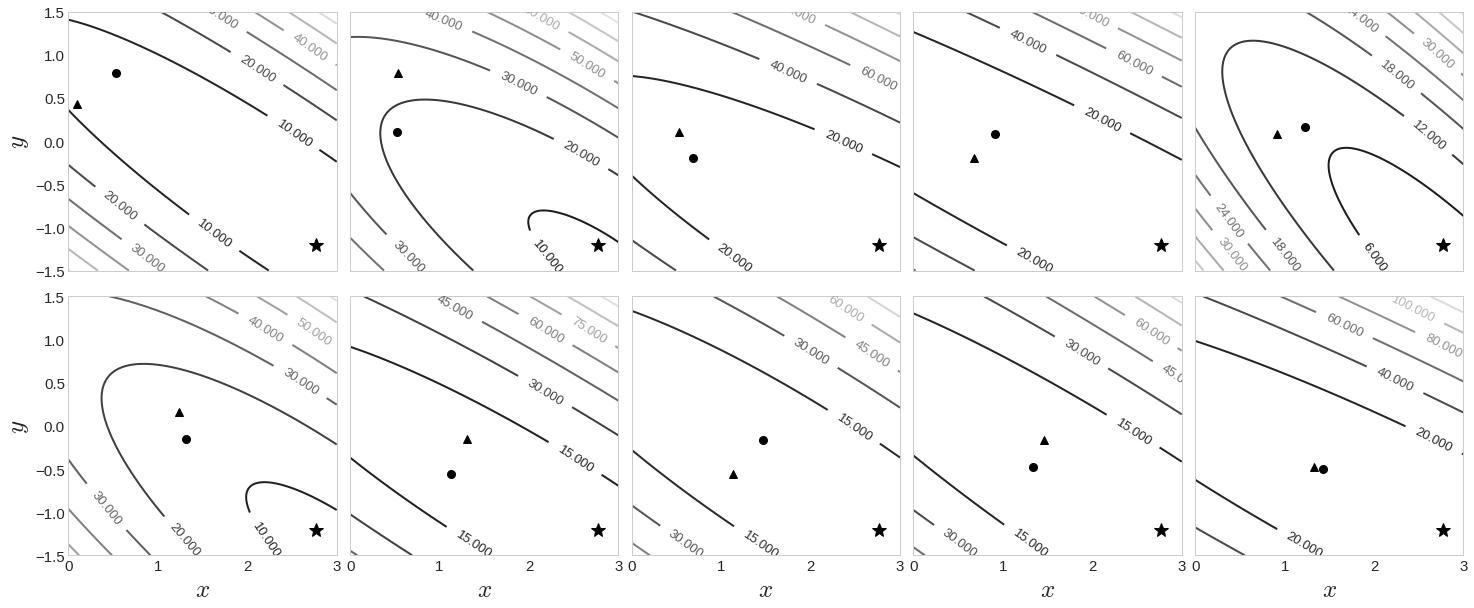

In [ ]:
fig, ax = plt.subplots(2, 5, sharex='all', sharey='all')
fig.set_size_inches((25,10))

np.random.seed(0)

epoch = 15
batch_size = 10
P = 1
eta = 0.05
w = np.random.uniform(-1, 1, P+1)
w_star = np.array([ 2.7696, -1.2081])
costs = [ J(w, P, X_test, Y_test) ]
ws = [w]

ww1 = np.linspace(0, 3, 200)
ww2 = np.linspace(-1.5, 1.5, 200)
W1, W2 = np.meshgrid(ww1, ww2)
W = np.array([W1, W2])

# initial cost
print('Epoch:  0, Cost: {:3.4f}'.format(costs[-1]))

X_test_idx = np.arange(100)

for e in range(epoch):
    np.random.shuffle(X_test_idx)
    
    for i in range(X_test.shape[0]//batch_size):
        # get batch
        X_batch = X_test[X_test_idx[i*batch_size:i*batch_size+batch_size]]
        Y_batch = Y_test[X_test_idx[i*batch_size:i*batch_size+batch_size]]
        
        # gradient
        c = grad_anal(w, P, X_batch, Y_batch)
        
        # update params
        w = w - eta*c
        
        ws.append(w)
        
        # 첫번째 에폭에서 각 배치마다 코스트를 그린다. (2,5)
        if e == 0 :
            p, q = divmod(i, 5)
            #############################################################
            # 에러함수의 제약조건 있는 상태와 없는 상태를 계산
            # 루프 돌리면 구현은 직관적이나 비효율적
            J_unconst = np.zeros_like(W1)
            
            for k in range(W1.shape[0]) :
                for l in range(W1.shape[1]) :
                    J_unconst[k,l] = J(W[:,k,l], P, X_batch, Y_batch) 
            #############################################################
            
            CS1 = ax[p,q].contour(W1, W2, J_unconst, cmap=plt.cm.gray)
            ax[p,q].clabel(CS1, CS1.levels,  fmt='%.3f', inline=True, fontsize=13)
            ax[p,q].plot(ws[-1][0], ws[-1][1], 'o', color='k', markersize=8)
            ax[p,q].plot(ws[-2][0], ws[-2][1], '^', color='k', markersize=8)
            ax[p,q].plot(w_star[0], w_star[1], '*', color='k', markersize=15)
            
            ax[p,q].xaxis.set_tick_params(labelsize=15)
            ax[p,q].yaxis.set_tick_params(labelsize=15)
            ax[p,q].set_xlabel('$x$', fontsize=25)
            ax[p,q].set_ylabel('$y$', fontsize=25)
            ax[p,q].grid(False)
            
    costs.append(J(w, P, X_test, Y_test))
    print('Epoch: {:2d}, Cost: {:3.4f}'.format(e+1, costs[-1]))

print(w)  

for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.1, wspace=0.05)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-13.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-13.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 10-14

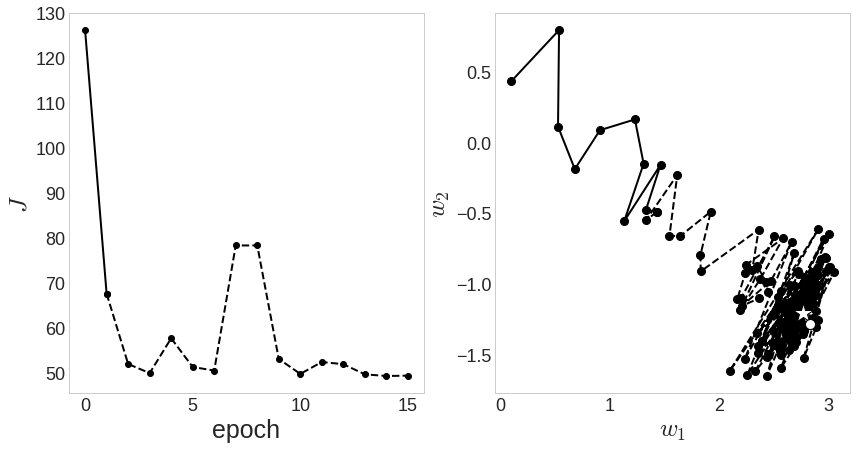

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('epoch', fontsize=25)
ax1.set_ylabel('$J$', fontsize=25)
ax1.grid(False)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$w_1$', fontsize=25)
ax2.set_ylabel('$w_2$', fontsize=25)
ax2.grid(False)

ax1.plot(costs[:2], 'o-', color='k')
ax1.plot(range(1,16), costs[1:], 'o--', color='k')

path = np.array(ws[:11])
ax2.plot(path[:,0], path[:,1], 'o-', markersize=8, color='k')
path = np.array(ws[10:])
ax2.plot(path[:,0], path[:,1], 'o--', markersize=8, color='k')
ax2.plot(w_star[0], w_star[1], '*', color='w', markersize=20, markeredgecolor='k')
ax2.plot(ws[-1][0], ws[-1][1], 'o', color='w', markersize=10, markeredgecolor='k')


if file_print == True :
    fig.savefig("imgs/chap10/fig10-14.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-14.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 노멀 방정식을 이용한 풀이

In [ ]:
P = 6

#########################################################################
# DESIGN MATRIX 
# 다항함수를 기반으로하는 design matrix Φ를 만든다.
PI = np.hstack( np.array([np.power(X_train.reshape(-1,1), p) for p in range(P+1)]) )
#########################################################################

PI.shape

(10, 7)

In [ ]:
w_normal = np.linalg.solve(np.dot(PI.T, PI), np.dot(PI.T , Y_train.reshape(N,1)) )
w_normal = np.dot(np.linalg.inv(np.dot(PI.T, PI)), np.dot(PI.T , Y_train.reshape(N,1)))
print(w_normal.shape)

w_normal = w_normal.reshape(-1)
print(w_normal.shape)

(7, 1)
(7,)


In [ ]:
# 다항식으로 구성한다. np.poly1d가 고차수 계수에서 저차수 계수 순서로 저장된 
# 리스트를 요구하므로 w_normal의 순서를 뒤집어 준다.
y_normal = np.poly1d(w_normal[::-1])
y_normal 

poly1d([  -8.0594,   68.3017, -222.4347,  345.8146, -256.8088,   76.3212,   -2.7943])

## 그림 10-15

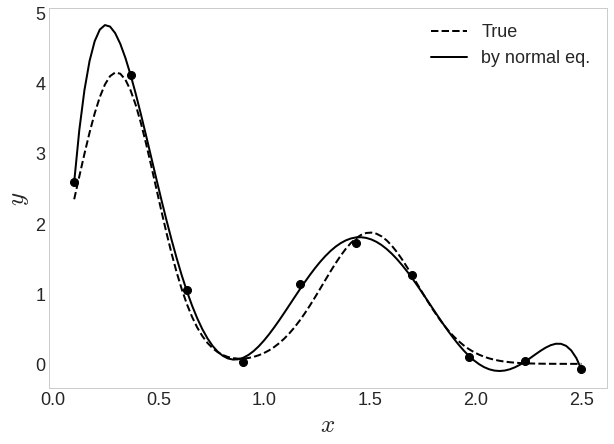

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k', label="True")
ax.plot(X_train, Y_train, 'o',  markersize=8 , color='k')
ax.plot(x, y_normal(x), color='k', label=r"by normal eq.")
ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-15.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-15.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [ ]:
P = 12
lamda = 0.00007 

#########################################################################
# DESIGN MATRIX 
# 다항함수를 기반으로하는 design matrix Φ를 만든다.
PI = np.hstack( np.array([np.power(X_train.reshape(-1,1), p) for p in range(P+1)]) )
#########################################################################

w_normal_reg = np.linalg.solve(np.dot(PI.T, PI)+lamda*np.eye(PI.shape[1]), np.dot(PI.T , Y_train.reshape(N,1)) ).reshape(-1)

# 다항식으로 구성한다. np.poly1d가 고차수 계수에서 저차수 계수 순서로 저장된 
# 리스트를 요구하므로 w_normal의 순서를 뒤집어 준다.
y_normal_reg = np.poly1d(w_normal_reg[::-1])

y_normal_reg

poly1d([ -0.3245,   3.2972, -12.0793,  16.2912,   3.8154, -18.5795, -13.0428,  15.7754,  31.0693,  -0.578 , -52.4367,  26.3559,   0.5927])

## 그림 10-16

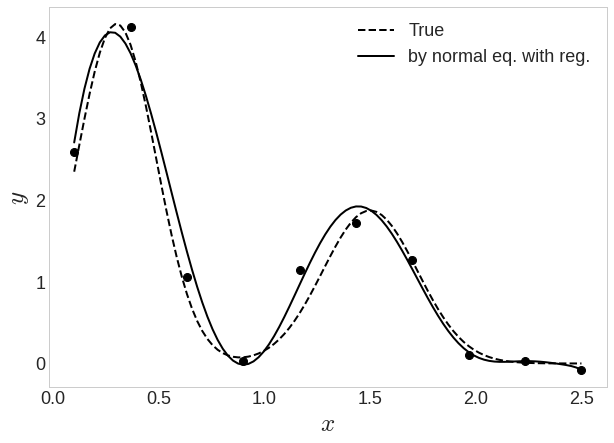

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k', label="True")
ax.plot(X_train, Y_train, 'o',  markersize=8 , color='k')
ax.plot(x, y_normal_reg(x), color='k', label=r"by normal eq. with reg.")
ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-16.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-16.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 입력이 여러개인 경우

In [ ]:
# http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr02.html
# col1 : 혈압 , col2 : 나이, col3: 몸무게(파운드)
blood_pressure = np.array([[132,  52, 173],
                           [143,  59, 184],
                           [153,  67, 194],
                           [162,  73, 211],
                           [154,  64, 196],
                           [168,  74, 220],
                           [137,  54, 188],
                           [149,  61, 188],
                           [159,  65, 207],
                           [128,  46, 167],
                           [166,  72, 217]])

## 그림 10-17

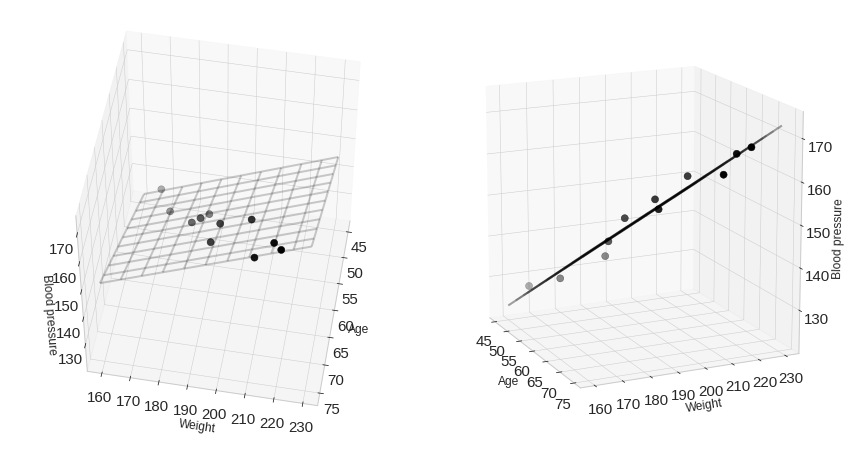

In [ ]:
X_train = blood_pressure[:,1:]
Y_train = blood_pressure[:,0]

# Design matrix
PI = np.hstack((np.ones(blood_pressure.shape[0]).reshape(-1,1), 
                blood_pressure[:,1:]))

w = np.linalg.solve( PI.T@PI, PI.T@Y_train )

x1 = np.linspace(45, 75, 50)   # 나이
x2 = np.linspace(160, 230, 50) # 몸무게
xx1, xx2 = np.meshgrid(x1, x2)

# 회귀 평면
P = w[0] + xx1*w[1] + xx2*w[2]

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")

ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)

ax1.scatter3D(blood_pressure[:,1], blood_pressure[:,2], blood_pressure[:,0], 
             s=50, color='k')
ax1.plot_wireframe(xx1, xx2, P, rstride=5, cstride=5, 
                cmap=plt.cm.gray, edgecolor="k", alpha=0.2)

ax1.view_init(50, 10)

ax1.set_xlabel('Age')
ax1.set_ylabel('Weight')
ax1.set_zlabel('Blood pressure')

###############################################################################

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)

ax2.scatter3D(blood_pressure[:,1], blood_pressure[:,2], blood_pressure[:,0], 
             s=50, color='k')
ax2.plot_wireframe(xx1, xx2, P, rstride=5, cstride=5, 
                cmap=plt.cm.gray, edgecolor="k", alpha=0.2)

ax2.view_init(15, -25)

ax2.set_xlabel('Age')
ax2.set_ylabel('Weight')
ax2.set_zlabel('Blood pressure')

plt.subplots_adjust(hspace=0.0, wspace=0.0)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-17.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-17.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 인공신경망을 이용한 선형회귀

In [ ]:
import torch
torch.__version__

'1.5.1+cu101'

In [ ]:
# 데이터 다시 초기화
X_train = D['X_train']
Y_train = D['Y_train']

In [ ]:
def train(X, y, model, loss_fn, optimizer, max_iter=5000, log=1000):
    for i in range(max_iter):
        Y_pred = model(X)

        # 손실을 계산하고 
        loss = loss_fn(Y_pred.view(-1), y)
        
        # 필요하면 출력
        if i % log == log-1 :
            print("Iter: {:5d}, Loss: {:f}".format(i+1, loss.item()))
            
        # 경사도 벡터를 초기화 시키고
        optimizer.zero_grad()

        # 역전파 한 후에
        loss.backward()

        # Optimizer의 step 함수를 호출하면 매개변수가 갱신
        optimizer.step()

### 입력레이어 1, 히든 레이어 3, 출력 레이어 1이고 비선형 활성화 함수 사용함

In [ ]:
torch.manual_seed(0)

X_train_torch = torch.Tensor(X_train.reshape(-1,1))
Y_train_torch = torch.Tensor(Y_train)

# 입력특성 1차원, 히든레이어 3차원, 출력 1차원으로 
D_in, H, D_out = 1, 3, 1

# torch.nn.Sequential을 사용하여 신경망을 구성한다.
model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),
            torch.nn.Sigmoid(),
            torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.15)

In [ ]:
train(X_train_torch, Y_train_torch, model, loss_fn, optimizer)

Iter:  1000, Loss: 0.011248
Iter:  2000, Loss: 0.038908
Iter:  3000, Loss: 0.008651
Iter:  4000, Loss: 0.008621
Iter:  5000, Loss: 0.008633


## 그림 10-19

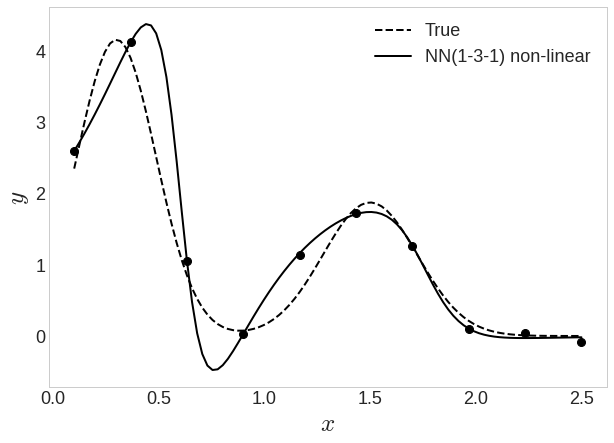

In [ ]:
X =  torch.Tensor(x.reshape(-1,1))
Y_pred = model(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k', label="True")
ax.plot(X_train, Y_train, 'o', markersize=8 , color='k')
plt.plot(x, Y_pred.detach().numpy(), color='k', label="NN(1-3-1) non-linear")

ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-19.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-19.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

### 입력레이어 1, 히든 레이어 3, 출력 레이어 1이고 비선형 활성화 함수 사용 안함

In [ ]:
torch.manual_seed(0)

model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),
            torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.15)

train(X_train_torch, Y_train_torch, model, loss_fn, optimizer)



Iter:  1000, Loss: 7.770454
Iter:  2000, Loss: 7.770416
Iter:  3000, Loss: 7.770417
Iter:  4000, Loss: 7.770416
Iter:  5000, Loss: 7.770418


## 그림 10-20

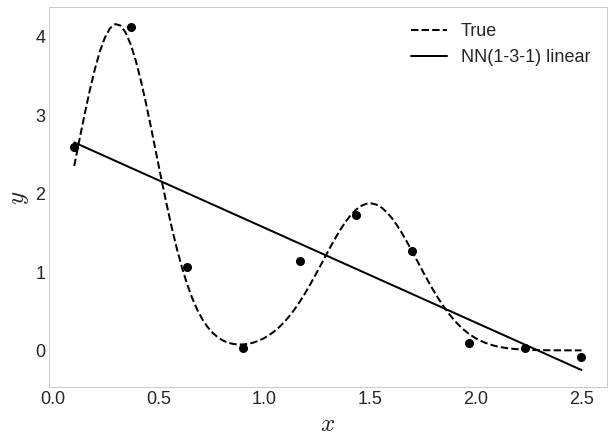

In [ ]:
X =  torch.Tensor(x.reshape(-1,1))
Y_pred = model(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k', label="True")
ax.plot(X_train, Y_train, 'o', markersize=8 , color='k')
plt.plot(x, Y_pred.detach().numpy(), color='k', label="NN(1-3-1) linear")

ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-20.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-20.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

### 입력에 다항식 특성을 적용한 경우

In [ ]:
torch.manual_seed(0)

# 여기서 다항 특성을 부여하고 신경망에서 활성화 함수를 빼버림
P = 6
X_poly = np.array([ X_train**i for i in range(0, P+1) ]).T
X_train_torch = torch.Tensor(X_poly)
Y_train_torch = torch.Tensor(Y_train)

D_in, H, D_out = P+1, 3, 1

model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),
            torch.nn.Linear(H, D_out)
        )

loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.999, 0.9999))

train(X_train_torch, Y_train_torch, model, loss_fn, optimizer, max_iter=70000, log=5000)

Iter:  5000, Loss: 7.258276
Iter: 10000, Loss: 6.155363
Iter: 15000, Loss: 5.367366
Iter: 20000, Loss: 3.863875
Iter: 25000, Loss: 3.692570
Iter: 30000, Loss: 3.470147
Iter: 35000, Loss: 3.185551
Iter: 40000, Loss: 2.803065
Iter: 45000, Loss: 2.298491
Iter: 50000, Loss: 1.709741
Iter: 55000, Loss: 1.134679
Iter: 60000, Loss: 0.680984
Iter: 65000, Loss: 0.367515
Iter: 70000, Loss: 0.191891


## 그림 10-21

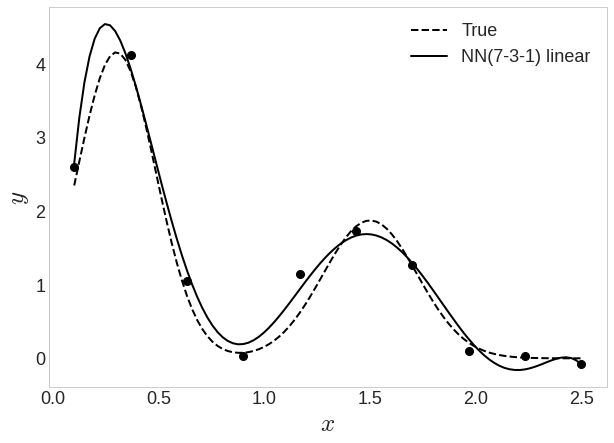

In [ ]:
X_poly = np.array([ x**i for i in range(0, P+1) ]).T
X = torch.Tensor(X_poly)
Y_pred = model(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

ax.plot(x, t, '--', color='k', label="True")
ax.plot(X_train, Y_train, 'o', markersize=8 , color='k')
plt.plot(x, Y_pred.detach().numpy(), color='k', label="NN(7-3-1) linear")

ax.legend(fontsize=18)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-21.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-21.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [ ]:
X_poly.shape

(100, 7)